<a href="https://colab.research.google.com/github/enriquecorimayo/Control_Optimo_2024/blob/main/Actividad_1_Enrique_Corimayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASO DE ESTUDIO 1 - Sistema de Dos Variables de Estado

## ITEM 1 Simulación Circuito RLC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

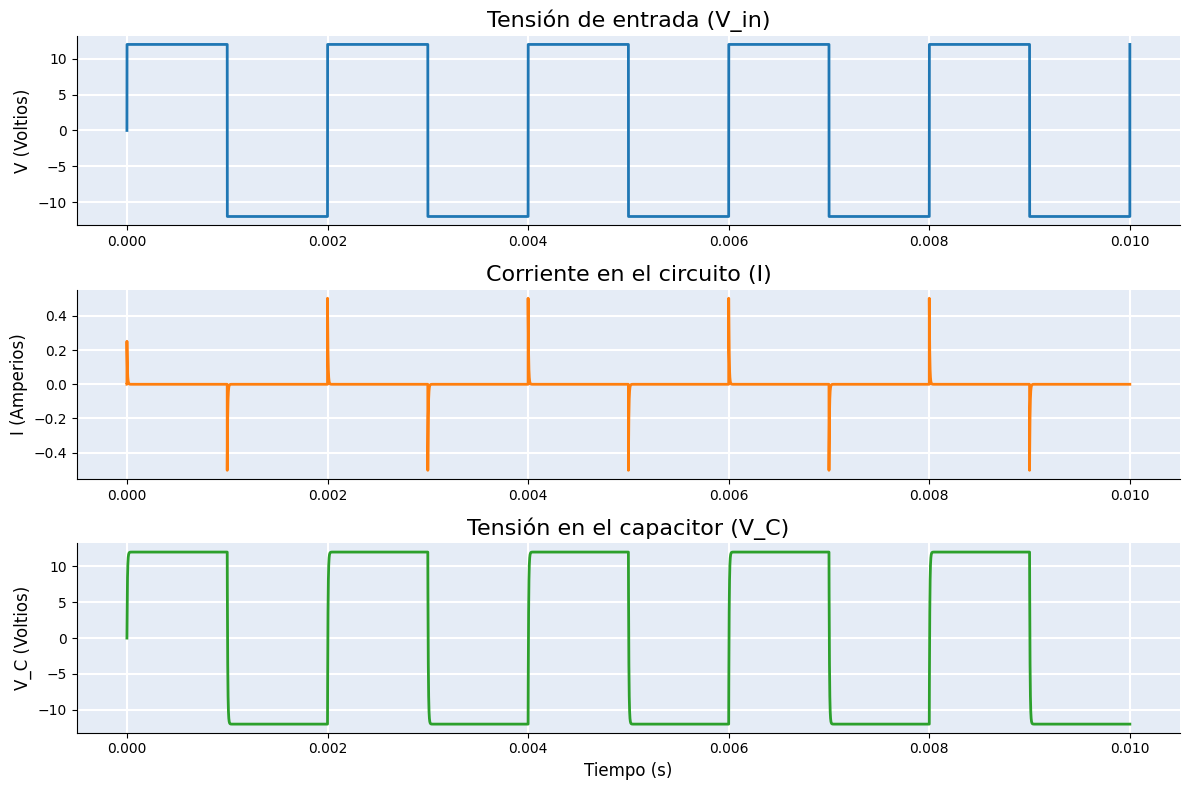

In [2]:
# Definimos los valores del circuito RLC
R = 47  # Resistencia en ohmios
L = 1e-6  # Inductancia en henrios
C = 100e-9  # Capacitancia en faradios

# Definimos la función que describe la entrada de tensión escalón que cambia de signo cada 1ms
def V_in(t):
    period = 1e-3  # Periodo de 1ms
    return 12 * np.sign(np.sin(np.pi * t / period))

# Parámetros de simulación
t_max = 0.01  # Tiempo máximo de simulación en segundos
dt = 1e-8     # Paso de tiempo reducido (10 ns)
n_steps = int(t_max / dt)  # Número de pasos de simulación

# Inicializamos las variables
t = np.linspace(0, t_max, n_steps)
q = np.zeros(n_steps)  # Carga en el capacitor
I = np.zeros(n_steps)  # Corriente en el circuito
V_C = np.zeros(n_steps)  # Tensión en el capacitor

# Condiciones iniciales
q[0] = 0
I[0] = 0

# Método de integración de Euler
for i in range(1, n_steps):
    dqdt = I[i-1]
    #Calculamos la derivada de I respecto al tiempo
    dIdt = (V_in(t[i-1]) - R * I[i-1] - q[i-1] / C) / L

    # Actualizamos las variables
    q[i] = q[i-1] + dqdt * dt
    I[i] = I[i-1] + dIdt * dt
    V_C[i] = q[i] / C

# Gráficas de la simulación
plt.figure(figsize=(12, 8))

# First subplot: Tensión de entrada
ax1 = plt.subplot(3, 1, 1)
ax1.set_facecolor('#E5ECF6')  # Light gray-blue background
plt.plot(t, V_in(t), color='#1f77b4', linewidth=2)  # Blue line for input voltage
plt.title("Tensión de entrada (V_in)", fontsize=16)
plt.ylabel("V (Voltios)", fontsize=12)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)  # White grid lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Second subplot: Corriente en el circuito
ax2 = plt.subplot(3, 1, 2)
ax2.set_facecolor('#E5ECF6')  # Light gray-blue background
plt.plot(t, I, color='#ff7f0e', linewidth=2)  # Orange line for current
plt.title("Corriente en el circuito (I)", fontsize=16)
plt.ylabel("I (Amperios)", fontsize=12)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Third subplot: Tensión en el capacitor
ax3 = plt.subplot(3, 1, 3)
ax3.set_facecolor('#E5ECF6')  # Light gray-blue background
plt.plot(t, V_C, color='#2ca02c', linewidth=2)  # Green line for capacitor voltage
plt.title("Tensión en el capacitor (V_C)", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("V_C (Voltios)", fontsize=12)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## ITEM 2 y 3 Obtención de Parametros Mediante Curvas de Medidas

In [3]:
import pandas as pd

In [4]:
rlc_data = pd.read_excel('/content/Curvas_Medidas_RLC_2024.xls')
rlc_data.columns = ['t', 'i_t', 'VC', 'VE']
rlc_data.head()

t  i_t   VC  VE
0  0.0001  0.0  0.0   0
1  0.0002  0.0  0.0   0
2  0.0003  0.0  0.0   0
3  0.0004  0.0  0.0   0
4  0.0005  0.0  0.0   0

In [5]:
!pip install -U control qtpy;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.1 MB/s eta 0:00:00


In [6]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00


In [7]:
#Importamos libreria para poder simular con la función de transferencia
import control as ctrl
from control.matlab import *
import plotly.graph_objects as go
import plotly.io as pio # Import the plotly.io module for static image export

Sabiendo que la función de Transferencia de un circuito RLC es:

$H(s) = \frac{1}{s^2 LC + sRC + 1}$

y partiendo de la forma generica de la función de transferencia:

$I(s) = K\frac{s}{(T_1s+1)(T_2s+1)}V_e(s)$

Tomando 3 puntos de la curva de datos podremos desepejar $T_1$ y $T_2$.

#### El siguiente ejemplo corresponde a uno de los Notebooks de la Clase:

R= 268.9954553031056 , L= 0.09864722075168736 , C= 1.0000084475204429e-05 .
 E_RMS= 1.0091118780703836 .




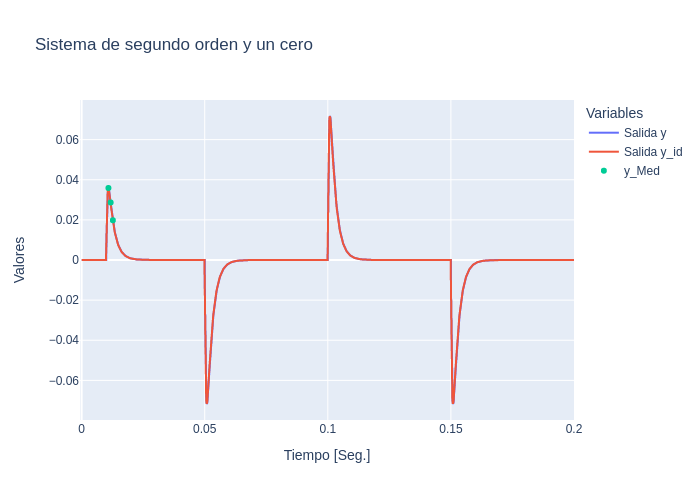

In [8]:
t_D = np.array(rlc_data['t'])
y_D=np.array(rlc_data['i_t'])
u=np.array(rlc_data['VE'])
# Ajustamos un retardo
ret = 0.01
# Seteamos arrays históricos
Y_aux=y_D[30:500]
t_aux=t_D[30:500]
u_aux=u[30:500]
y1i=Y_aux.max()
uMAX=u.max()
lugar = np.argmin(np.abs(y1i-Y_aux))
t1i=t_aux[lugar]
# Elegimos el punto 1 como el máximo mas un retaro
lugar = np.argmin(np.abs((t1i-ret)+ret-t_D))
y1i=y_D[lugar]/uMAX
# Elegimos los puntos 2 y 3
lugar = np.argmin(np.abs((t1i-ret)*2+ret-t_D))
t2i=t_D[lugar]
y2i=y_D[lugar]/uMAX
lugar = np.argmin(np.abs((t1i-ret)*3+ret-t_D))
t3i=t_D[lugar]
y3i=y_D[lugar]/uMAX
# Cálculo de alfa 1
alfa1 = (y2i - 4*y1i*y3i*np.sqrt(1/(4*y1i*y3i-3*y2i**2))+3*(y2i**2)*np.sqrt(1/(4*y1i*y3i-3*(y2i**2))))/(2*y1i)
# Cálculo de alfa 2
alfa2=y2i/y1i-alfa1
# Cálculo T1 y T2
T1 =(-(t1i-ret)/np.log(alfa1))
T2 =(-(t1i-ret)/np.log(alfa2))
# Cálculo de Beta
beta=y1i/(alfa1-alfa2)
beta1=y2i/(alfa1**2-alfa2**2)
beta2=y3i/(alfa1**3-alfa2**3) #%Deben ser todos iguales
# Cálculo de la ganancia
K=y1i*(T1-T2)/(alfa1-alfa2) # y1i ya está divido en 12V
# Función de transferencia
sys_iRLC=K*tf([1, 0], np.convolve([T1, 1],[T2, 1]))
# Convertimos la función de transferencia a espacio de estados
sys_iRLC_ss = ss(sys_iRLC)
# Simulamos
[y_1,t_1,ent]=lsim(sys_iRLC_ss, u, t_D, [0,0])
# Finalmente podemos obetener las contantes C R L despejando de la funcíon de transferencia
C=K
R=(T1+T2)/C
L=T1*T2/C
# Calculo del Error cuadrático medio
v_param=np.array([2.7e2,100e-3,10e-6])
est_param=np.array([R,L,C])
e_rms=np.sum((est_param-v_param)@np.transpose(est_param-v_param))
print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms, '.\n\n')
# Agregamos los subplots
df_p= pd.DataFrame({'t': t_D, 'y': y_D})
df_id= pd.DataFrame({'t': t_1, 'y': y_1})
df2 = pd.DataFrame({'tp': [t1i , t2i, t3i ],'yp': [y1i*12, y2i*12,y3i*12 ]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_p['t'], y=df_p['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Plot
fig.update_layout(title='Sistema de segundo orden y un cero',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
fig.show()
pio.write_image(fig, file='rlc_mod.png', format='png',engine="kaleido") # Use pio.write_image to save the figure

from IPython.display import Image
Image('rlc_mod.png')

# CASO DE ESTUDIO 2 - Sistema de Tres Variables de Estado

## ITEM 4 Modelado MOTOR CC

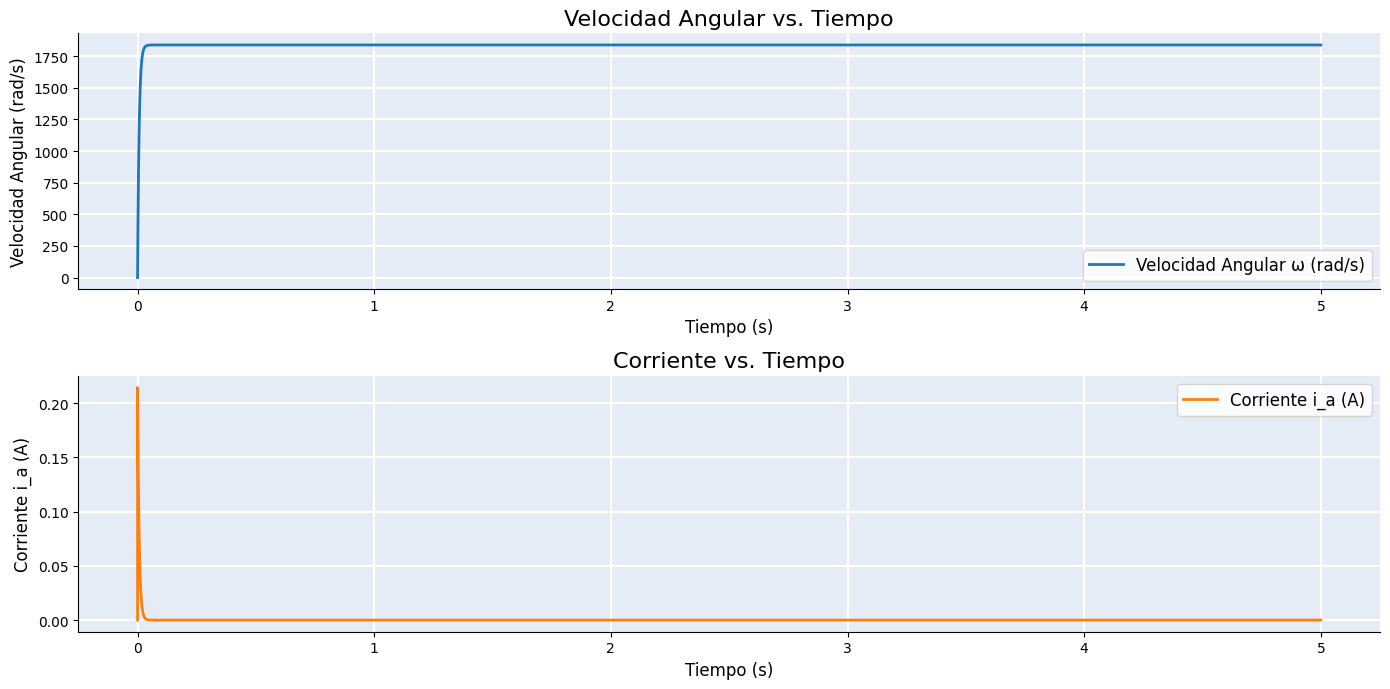

Velocidad Angular máxima: 1837.672281768974 rad/s
Corriente máxima: 0.21455996509437447 A


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L_AA = 366e-6  # Henrios
J = 5e-9  # kg*m^2
R_AA = 55.6  # Ohmios
B = 0  # kg*m^2/s
K_i = 6.49e-3  # Nm/A
K_m = 6.53e-3  # V*s/rad
V = 12  # Voltios
delta_t = 1e-7  # segundos
T_L = 0  # Torque de carga (asumido inicialmente como 0)

# Tiempo de simulación
t_max = 5  # segundos
n_steps = int(t_max / delta_t)  # número de pasos de simulación

# Inicialización de variables
i_a = np.zeros(n_steps)
omega = np.zeros(n_steps)
theta = np.zeros(n_steps)
time = np.linspace(0, t_max, n_steps)

# Algoritmo de integración de Euler
for step in range(1, n_steps):
    di_a_dt = (V - R_AA * i_a[step - 1] - K_m * omega[step - 1]) / L_AA
    d_omega_dt = (K_i * i_a[step - 1] - B * omega[step - 1] - T_L) / J

    i_a[step] = i_a[step - 1] + di_a_dt * delta_t
    omega[step] = omega[step - 1] + d_omega_dt * delta_t
    theta[step] = theta[step - 1] + omega[step - 1] * delta_t

# Gráficas de los resultados
plt.figure(figsize=(14, 7))

# Plotly-like background and styling
ax1 = plt.subplot(2, 1, 1)
ax1.set_facecolor('#E5ECF6')  # Light gray-blue background
plt.plot(time, omega, label='Velocidad Angular ω (rad/s)', color='#1f77b4', linewidth=2)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Velocidad Angular (rad/s)', fontsize=12)
plt.title('Velocidad Angular vs. Tiempo', fontsize=16)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)  # White grid lines
plt.legend(fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Second subplot
ax2 = plt.subplot(2, 1, 2)
ax2.set_facecolor('#E5ECF6')  # Light gray-blue background
plt.plot(time, i_a, label='Corriente i_a (A)', color='#ff7f0e', linewidth=2)  # Orange line for current
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Corriente i_a (A)', fontsize=12)
plt.title('Corriente vs. Tiempo', fontsize=16)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)  # White grid lines
plt.legend(fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Valores máximos
max_omega = np.max(omega)
max_ia = np.max(i_a)

print(f'Velocidad Angular máxima: {max_omega} rad/s')
print(f'Corriente máxima: {max_ia} A')


In [10]:
#Torque Máximo
max_T = max_ia*K_i
print(max_T, " Nm")

0.0013924941734624904  Nm


## ITEM 5 Obtención de Parametros Mediante Curvas de Medidas

Utilizamos el Metodo de Chen: https://www.sciencedirect.com/science/article/pii/S0895717710005613?via%3Dihub

In [11]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.io import savemat

705
708
711


<ipython-input-12-cc6cc7ed763a>:40: RuntimeWarning:

divide by zero encountered in scalar divide

<ipython-input-12-cc6cc7ed763a>:48: RuntimeWarning:

invalid value encountered in scalar multiply



19999 19999


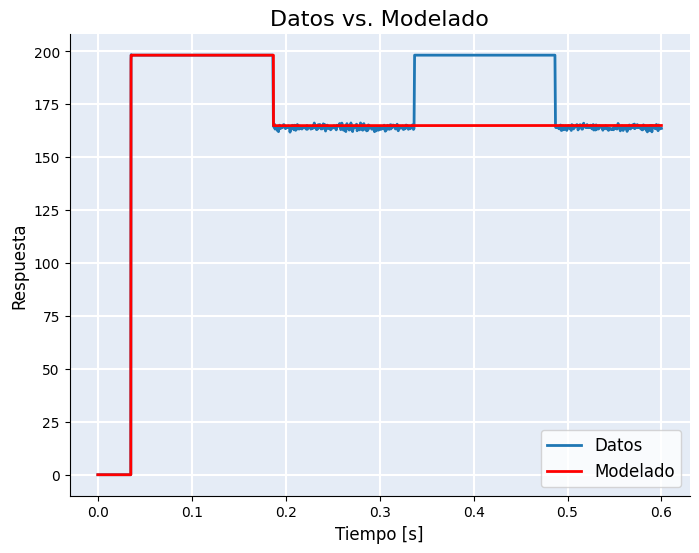

In [12]:
# Cargar los datos del archivo Excel
tabla = pd.read_excel('/content/Curvas_Medidas_Motor_2024.xls').values
t_D = tabla[:, 0]
y_D = tabla[:, 1]
StepAmplitude = 12  # 12 V de entrada en Va

# wr/va
ret = 0.03515
t = 0.00015

# Buscar el valor más cercano
lugar = np.argmin(np.abs(t + ret - t_D))
print(lugar)
y_t = y_D[lugar]
t = t_D[lugar] - ret

lugar = np.argmin(np.abs(2 * t + ret - t_D))
print(lugar)
y_t2 = y_D[lugar]
t2 = t_D[lugar] - ret

lugar = np.argmin(np.abs(3 * t + ret - t_D))
print(lugar)
y_t3 = y_D[lugar]
t3 = t_D[lugar] - ret

# Calcular la constante k
k = 198.2488022 / StepAmplitude

# Método de Chen
k1 = (1 / StepAmplitude) * y_t / k - 1
k2 = (1 / StepAmplitude) * y_t2 / k - 1
k3 = (1 / StepAmplitude) * y_t3 / k - 1

b = 4 * k1**3 * k3 - 3 * k1**2 * k2**2 - 4 * k2**3 + k3**2 + 6 * k1 * k2 * k3
if b<=0.01:
  b=0
alfa1 = (k1 * k2 + k3 - np.sqrt(b)) / (2 * (k1**2 + k2))
alfa2 = (k1 * k2 + k3 + np.sqrt(b)) / (2 * (k1**2 + k2))
beta = (2 * k1**3 + 3 * k1 * k2 + k3 - np.sqrt(b)) / np.sqrt(b)

T1 = -t / np.log(alfa1)
T2 = -t / np.log(alfa2)

# Solo la parte real
T1 = np.real(T1)
T2 = np.real(T2)
T3 = np.real(beta * (T1 - T2) + T1)

# Sistema de transferencia
sys_va = signal.TransferFunction([k], np.convolve([T1, 1], [T2, 1]))

# Simulación
dt = 3e-5
t_s = np.arange(0, t_D[-1], dt)
u1_Va = np.zeros(int(ret / dt))
u2_Va = 12 * np.ones(int((0.6 - ret) / dt))
u_Va = np.concatenate([u1_Va, u2_Va])
# Asegurarse de que u_Va y t_s tengan la misma longitud
if len(u_Va) != len(t_s):
    min_len = min(len(u_Va), len(t_s))
    u_Va = u_Va[:min_len]
    t_s = t_s[:min_len]

# Simulación
t1, y1, _ = signal.lsim(sys_va, u_Va, t_s)
# Respuesta del sistema
t1, y1, _ = signal.lsim(sys_va, u_Va, t_s)

# Parámetros para TL
ret_tl = 0.1869
t_tl = 0.00015

# Buscar el valor más cercano
lugar = np.argmin(np.abs(t_tl + ret_tl - t_D))
y_t_tl = y_D[lugar]
t_tl = t_D[lugar] - ret_tl

lugar = np.argmin(np.abs(2 * t_tl + ret_tl - t_D))
y_t2_tl = y_D[lugar]
t2_tl = t_D[lugar] - ret_tl

lugar = np.argmin(np.abs(3 * t_tl + ret_tl - t_D))
y_t3_tl = y_D[lugar]
t3_tl = t_D[lugar] - ret_tl

TL = 0.00101075  # Amplitud del escalón de torque de entrada
k_tl = -(164.8 - 198.2) / TL

# Método de Chen para TL
yid_1 = -(y_t_tl - 198.2)
yid_2 = -(y_t2_tl - 198.2)
yid_3 = -(y_t3_tl - 198.2)

k1_tl = (1 / TL) * yid_1 / k_tl - 1
k2_tl = (1 / TL) * yid_2 / k_tl - 1
k3_tl = (1 / TL) * yid_3 / k_tl - 1

b_tl = 4 * k1_tl**3 * k3_tl - 3 * k1_tl**2 * k2_tl**2 - 4 * k2_tl**3 + k3_tl**2 + 6 * k1_tl * k2_tl * k3_tl
alfa1_tl = (k1_tl * k2_tl + k3_tl - np.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
alfa2_tl = (k1_tl * k2_tl + k3_tl + np.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
beta_tl = (2 * k1_tl**3 + 3 * k1_tl * k2_tl + k3_tl - np.sqrt(b_tl)) / np.sqrt(b_tl)

T1_tl = -t_tl / np.log(alfa1_tl)
T2_tl = -t_tl / np.log(alfa2_tl)

# Solo la parte real
T1_tl = np.real(T1_tl)
T2_tl = np.real(T2_tl)
T3_tl = beta_tl * (T1_tl - T2_tl) + T1_tl

# Sistema de transferencia para TL
sys_T = signal.TransferFunction([k_tl * T3_tl, k_tl], np.convolve([T1_tl, 1], [T2_tl, 1]))

# Simulación para TL
u1_T = np.zeros(int(0.1869 / dt))
u2_T = TL * np.ones(int((0.6 - 0.1869) / dt))
u_T = np.concatenate([u1_T, u2_T])
print(len(u_T),len(t_s))
t2_, y2, _ = signal.lsim(sys_T, u_T, t_s)

# Graficar resultados
plt.figure(figsize=(8, 6))

# Set Plotly-like background
ax = plt.gca()
ax.set_facecolor('#E5ECF6')  # Light gray-blue background

# Plot actual data
plt.plot(t_D, y_D, label='Datos', color='#1f77b4', linewidth=2)  # Blue line for data

# Plot model
plt.plot(t_s, y1 + y2, 'r', label='Modelado', linewidth=2)  # Red line for the model

# Add labels
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Respuesta', fontsize=12)
plt.title('Datos vs. Modelado', fontsize=16)

# Add legend
plt.legend(fontsize=12)

# Add Plotly-like grid
plt.grid(True, color='white', linestyle='-', linewidth=1.5)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

### Finalmente con T1, T2 y T3 obtenidos y las funciones de transferencia podemos determinar las constantes del motor como se hizo en el ITEM 2

## ITEM 6 Controlador PID

In [13]:
Laa = 366e-6
J = 5e-9
Ra = 55.6
B = 0
Ki = 6.49e-3
Km = 6.53e-3

# Función para modelar el motor
def modmotor(t_etapa, xant, accion):

    Va = accion[0]
    TL = accion[1]
    TLp = accion[2]

    h = 1e-7
    omega = xant[0]
    wp = xant[1]

    # Euler
    for _ in range(int(t_etapa / h)):
        wppVa = (-wp * (Ra * J + Laa * B) - omega * (Ra * B + Ki * Km) + Va * Ki - (Laa * TLp + Ra * TL)) / (J * Laa)
        wp = wp + h * wppVa
        omega = omega + h * wp

    return np.array([omega, wp])

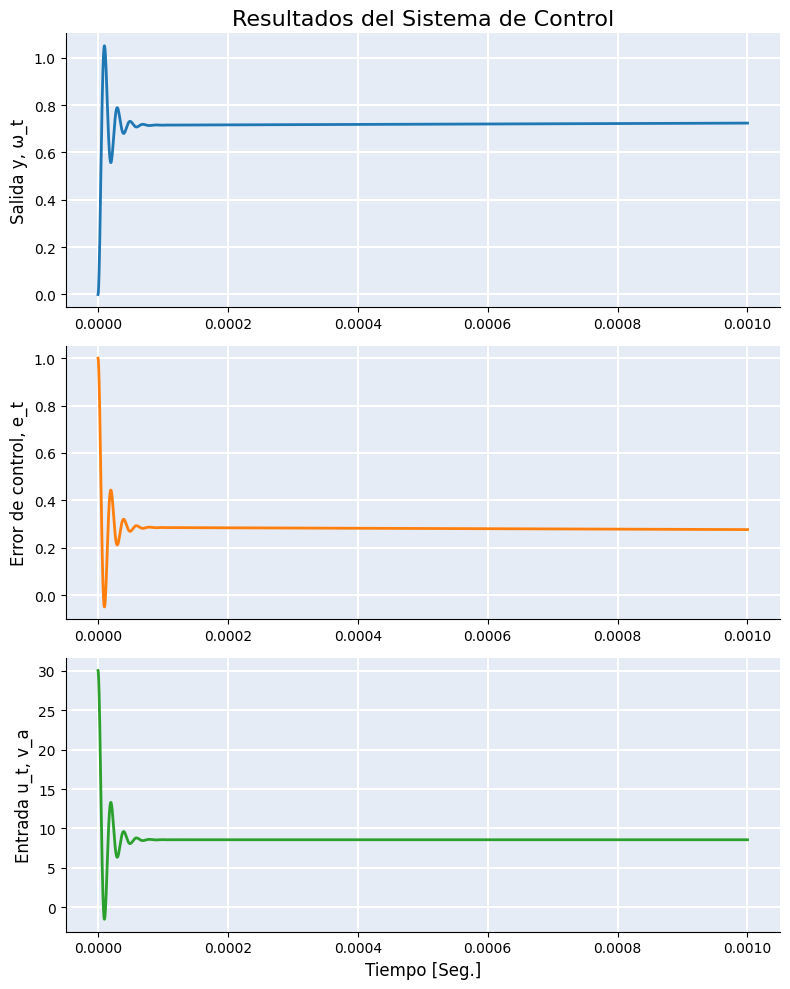

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Inicializar variables
X = np.array([-0, 0])
ii = 0
t_etapa = 1e-7
wRef = 1
tF = 0.001

# Constantes PID
KP = 30
KI = 1000
KD = 0.000
color = 'b'

# Tiempo de Muestreo
Ts = t_etapa
A1 = ((2 * KP * Ts) + (KI * (Ts ** 2)) + (2 * KD)) / (2 * Ts)
B1 = (-2 * KP * Ts + KI * (Ts ** 2) - 4 * KD) / (2 * Ts)
C1 = KD / Ts

# Variables de Error y Control
e = np.zeros(int(tF / t_etapa) + 2000)
u = 0

# Torques
TL = 1e-3 * np.ones_like(e)
TLp = np.append([0], np.diff(TL)) / Ts

# Historial de estados, acciones y errores
x1 = []
x2 = []
acc = []
error = []

# Simulación con euler
for t in np.arange(0, tF + t_etapa, t_etapa):
    ii += 1
    k = ii + 2

    X = modmotor(t_etapa, X, [u, TL[ii], TLp[ii]])

    e[k] = wRef - X[0]

    # PID
    u += A1 * e[k] + B1 * e[k - 1] + C1 * e[k - 2]

    x1.append(X[0])  # Omega
    x2.append(X[1])  # wp
    acc.append(u)     # Control
    error.append(e[k])

# Create time vector
t = np.arange(0, tF + t_etapa, t_etapa)

# Plotting results with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plotly-like background color
for ax in axs:
    ax.set_facecolor('#E5ECF6')  # Light gray-blue background
    ax.grid(True, color='white', linestyle='-', linewidth=1.5)  # White grid
    ax.spines['top'].set_visible(False)  # Remove top spines
    ax.spines['right'].set_visible(False)  # Remove right spines

# Plot omega (x1)
axs[0].plot(t, x1, color='#1f77b4', linewidth=2)  # Blue line
axs[0].set_ylabel('Salida y, ω_t', fontsize=12)
axs[0].set_title('Resultados del Sistema de Control', fontsize=16)  # Add a title for the first plot

# Plot error
axs[1].plot(t, error, color='#ff7f0e', linewidth=2)  # Orange line
axs[1].set_ylabel('Error de control, e_t', fontsize=12)

# Plot control input (acc)
axs[2].plot(t, acc, color='#2ca02c', linewidth=2)  # Green line
axs[2].set_ylabel('Entrada u_t, v_a', fontsize=12)
axs[2].set_xlabel('Tiempo [Seg.]', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## ITEM 7 Controlador en Variables de Estado con Referencia

In [15]:
import numpy as np
from scipy.signal import place_poles
import matplotlib.pyplot as plt

# Parámetros del motor DC
J = 5e-9  # Momento de inercia del rotor [kg.m^2]
L = 366e-6   # Inductancia del circuito del motor [H]
R = 55.6   # Resistencia del circuito del motor [ohm]
K_t = 6.53e-3  # Constante de par [N.m/A]
K_e = 6.49e-3  # Constante de retroalimentación electromotriz [V.s/rad]
T_L_pos = 1.15e-3  # Par de carga para pi/2
T_L_neg = 0        # Par de carga para -pi/2

# Laa = 366e-6
# J = 5e-9
# Ra = 55.6
# B = 0
# Ki = 6.49e-3
# Km = 6.53e-3

# Consignas
theta_target_pos = np.pi / 2  # Consigna de ángulo para pi/2 [rad]
theta_target_neg = -np.pi / 2  # Consigna de ángulo para -pi/2 [rad]

# Definir matrices de espacio de estados
A = np.array([[0, 1, 0],
              [0, -K_e / J, K_t / J],
              [0, -K_t / L, -R / L]])

B = np.array([[0],
              [0],
              [1 / L]])

C = np.array([[1, 0, 0]])

# Definir los polos deseados para el sistema (puedes ajustar estos valores)
desired_poles = np.array([-5, -10, -15])

# Calculamos la matriz de ganancia K mediante asignación de polos
place_obj = place_poles(A, B, desired_poles)
K = place_obj.gain_matrix
print("Matriz K de retroalimentación de estados:")
print(K)
G=-np.linalg.inv(C@np.linalg.inv(A-B*K)@B)
print(G)

Matriz K de retroalimentación de estados:
[[ 2.10185118e-07  4.72140493e+02 -5.30657020e+02]]
[[2.10185118e-07]]


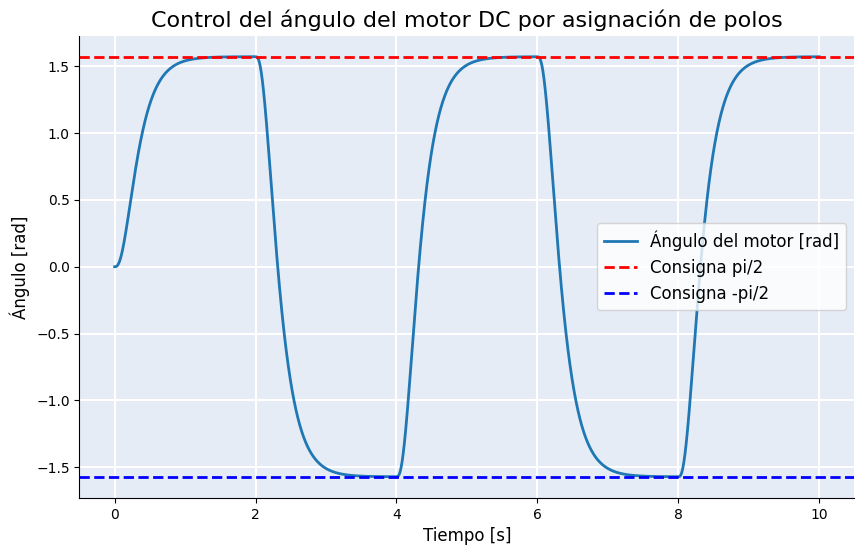

In [16]:
# Parámetros de simulación
dt = 0.001  # Paso de integración [s]
sim_time = 10  # Tiempo total de simulación [s]
num_steps = int(sim_time / dt)  # Número de pasos de simulación
change_interval = 2  # Intervalo de cambio de consigna [s]

# Inicialización de variables
x = np.array([[0.0],  # ángulo inicial (float)
              [0.0],  # velocidad angular inicial (float)
              [0.0]])  # corriente inicial (float)

theta_history = []
time_history = []
u_history = []
current_history = []
angular_history = []

# Simulación del sistema
for step in range(num_steps):
    t = step * dt

    # Cambiar la consigna cada 2 segundos
    if int(t // change_interval) % 2 == 0:
        theta_target = theta_target_pos
        T_L = T_L_pos
    else:
        theta_target = theta_target_neg
        T_L = T_L_neg

    # Controlador: retroalimentación de estados
    u = -K @ x + G[0,0] * theta_target
    u_history.append(u[0, 0])

    # Dinámica del sistema
    x_dot = A @ x + B * u
    x[0] += x_dot[0] * dt  # ángulo
    x[1] += x_dot[1] * dt  # velocidad angular
    x[2] += x_dot[2] * dt  # corriente

    # Almacenamos los datos para la gráfica
    theta_history.append(x[0, 0])
    angular_history.append(x[1, 0])
    current_history.append(x[2, 0])
    time_history.append(t)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Set Plotly-like background color
ax = plt.gca()
ax.set_facecolor('#E5ECF6')  # Light gray-blue background

# Plot data
plt.plot(time_history, theta_history, label='Ángulo del motor [rad]', color='#1f77b4', linewidth=2)  # Blue line
plt.axhline(theta_target_pos, color='red', linestyle='--', label='Consigna pi/2', linewidth=2)  # Red dashed line
plt.axhline(theta_target_neg, color='blue', linestyle='--', label='Consigna -pi/2', linewidth=2)  # Blue dashed line

# Set labels and title
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Ángulo [rad]', fontsize=12)
plt.title('Control del ángulo del motor DC por asignación de polos', fontsize=16)

# Add legend
plt.legend(fontsize=12)

# Add Plotly-like grid
plt.grid(True, color='white', linestyle='-', linewidth=1.5)

# Remove top and right spines to clean up the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

## ITEM 8 Controlador en Variables de Estado con Observador

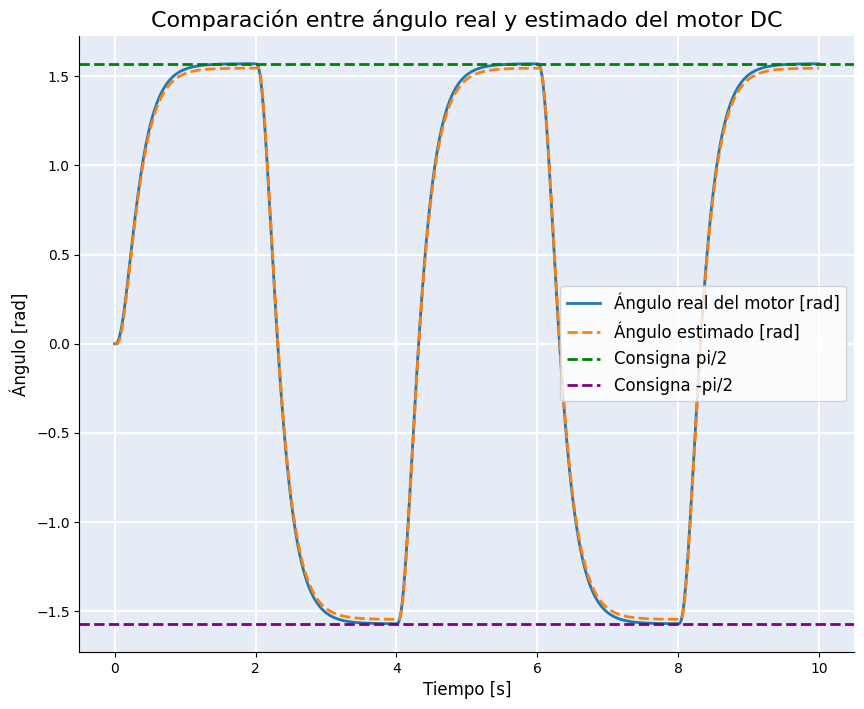

In [17]:
import numpy as np
from scipy.signal import place_poles
import matplotlib.pyplot as plt

# Parámetros del motor DC
J = 0.01  # Momento de inercia del rotor [kg.m^2]
L = 0.5   # Inductancia del circuito del motor [H]
R = 1.0   # Resistencia del circuito del motor [ohm]
K_t = 0.01  # Constante de par [N.m/A]
K_e = 0.01  # Constante de retroalimentación electromotriz [V.s/rad]
T_L_pos = 1.15e-3  # Par de carga para pi/2
T_L_neg = 0        # Par de carga para -pi/2

# Consignas
theta_target_pos = np.pi / 2  # Consigna de ángulo para pi/2 [rad]
theta_target_neg = -np.pi / 2  # Consigna de ángulo para -pi/2 [rad]

# Definir matrices de espacio de estados
A = np.array([[0, 1, 0],
              [0, -K_e / J, K_t / J],
              [0, -K_t / L, -R / L]])

B = np.array([[0],
              [0],
              [1 / L]])

C = np.array([[1, 0, 0]])

# Polos deseados para el controlador
desired_poles = np.array([-5, -10, -15])

# Calculamos la matriz de ganancia K mediante asignación de polos
place_obj = place_poles(A, B, desired_poles)
K = place_obj.gain_matrix
# Calculo ganancia de prealimentación
G=-np.linalg.inv(C@np.linalg.inv(A-B*K)@B)
# Polos deseados para el observador (Más rapidos que los del controlador)
observer_poles = np.array([-20, -30, -40])
place_obj_obs = place_poles(A.T, C.T, observer_poles)
L = place_obj_obs.gain_matrix.T
A_o = A.T
B_o = C.T
C_o = B.T
#Calculo ganancia de prealimentación
G_o = np.linalg.inv(C_o@np.linalg.inv(A_o-B_o*K)@B_o)
# Parámetros de simulación
dt = 0.001  # Paso de integración [s]
sim_time = 10  # Tiempo total de simulación [s]
num_steps = int(sim_time / dt)  # Número de pasos de simulación
change_interval = 2  # Intervalo de cambio de consigna [s]

# Inicialización de variables (como floats)
x = np.array([[0.0],  # ángulo inicial (float)
              [0.0],  # velocidad angular inicial (float)
              [0.0]])  # corriente inicial (float)

x_hat = np.array([[0.0],  # ángulo estimado (float)
                  [0.0],  # velocidad angular estimada (float)
                  [0.0]])  # corriente estimada (float)
# Arrays para guardar la historia
theta_history = []
theta_hat_history = []
time_history = []
u_history = []
u_hat_history = []
current_history = []

# Simulación del sistema
for step in range(num_steps):
    t = step * dt

    # Cambiar la consigna cada 2 segundos
    if int(t // change_interval) % 2 == 0:
        theta_target = theta_target_pos
        T_L = T_L_pos
    else:
        theta_target = theta_target_neg
        T_L = T_L_neg

    # Controlador: retroalimentación de estados
    u = -K @ x + G[0, 0] * theta_target
    u_history.append(u[0, 0])

    u_o = -K @ x_hat + G_o[0, 0] * theta_target
    u_hat_history.append(u_o[0, 0])

    # Dinámica del sistema
    x_dot = A @ x + B * u
    x[0] += x_dot[0] * dt  # ángulo
    x[1] += x_dot[1] * dt  # velocidad angular
    x[2] += x_dot[2] * dt  # corriente

    # Estimación del estado
    y = C @ x
    x_hat_dot = A @ x_hat + B * u_o + L @ (y - C @ x_hat)
    x_hat += x_hat_dot * dt  # ángulo estimado
    theta_hat_history.append(x_hat[0, 0])
    current_history.append(x[2, 0])
    # Almacenamos los datos para la gráfica
    theta_history.append(x[0, 0])
    time_history.append(t)

# Graficar los resultados
fig = plt.figure(figsize=(10, 8))

# Set Plotly-like background
fig.patch.set_facecolor('white')  # Figure background
ax = plt.gca()
ax.set_facecolor('#E5ECF6')  # Axis background (light gray-blue)

# Plot data
plt.plot(time_history, theta_history, label='Ángulo real del motor [rad]', color='#1f77b4', linewidth=2)  # Blue line
plt.plot(time_history, theta_hat_history, label='Ángulo estimado [rad]', color='#ff7f0e', linestyle='--', linewidth=2)  # Orange dashed line
plt.axhline(theta_target_pos, color='green', linestyle='--', label='Consigna pi/2', linewidth=2)  # Green dashed line
plt.axhline(theta_target_neg, color='purple', linestyle='--', label='Consigna -pi/2', linewidth=2)  # Purple dashed line

# Labels and title
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Ángulo [rad]', fontsize=12)
plt.title('Comparación entre ángulo real y estimado del motor DC', fontsize=16)

# Legend
plt.legend(fontsize=12)

# Grid (Plotly-style white grid)
plt.grid(True, color='white', linestyle='-', linewidth=1.5)

# Remove top and right spines (to mimic Plotly's clean look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

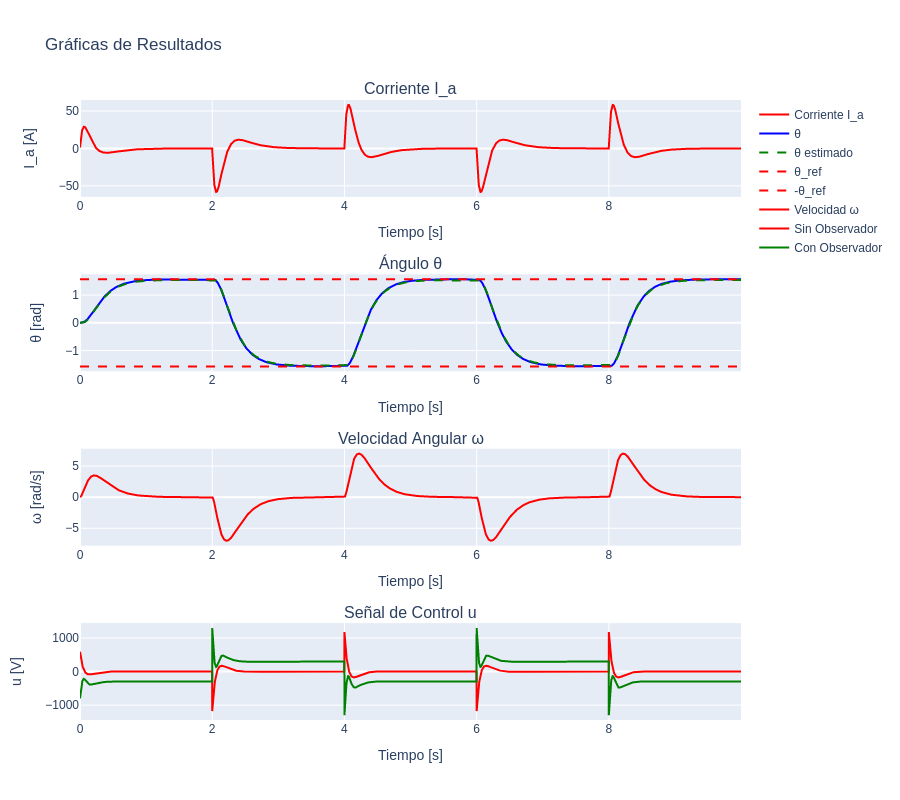

In [19]:
# Create subplots
fig = make_subplots(rows=4, cols=1, subplot_titles=("Corriente I_a", "Ángulo θ", "Velocidad Angular ω", "Señal de Control u"))

# Subplot 1: Corriente I_a
fig.add_trace(
    go.Scatter(x=time_history, y=current_history, mode='lines', line=dict(color='red'), name='Corriente I_a'),
    row=1, col=1
)
fig.update_yaxes(title_text="I_a [A]", row=1, col=1)
fig.update_xaxes(title_text="Tiempo [s]", row=1, col=1)

# Subplot 2: Ángulo θ
fig.add_trace(
    go.Scatter(x=time_history, y=theta_history, mode='lines', line=dict(color='blue'), name='θ'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=time_history, y=theta_hat_history, mode='lines', line=dict(color='green',dash='dash'), name='θ estimado'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=time_history, y=np.pi/2 * np.ones(len(time_history)), mode='lines', line=dict(color='red',dash='dash'), name='θ_ref'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=time_history, y=-np.pi/2 * np.ones(len(time_history)), mode='lines', line=dict(color='red',dash='dash'), name='-θ_ref'),
    row=2, col=1
)
fig.update_yaxes(title_text="θ [rad]", row=2, col=1)
fig.update_xaxes(title_text="Tiempo [s]", row=2, col=1)

# Subplot 3: Velocidad Angular ω
fig.add_trace(
    go.Scatter(x=time_history, y=angular_history, mode='lines', line=dict(color='red'), name='Velocidad ω'),
    row=3, col=1
)
fig.update_yaxes(title_text="ω [rad/s]", row=3, col=1)
fig.update_xaxes(title_text="Tiempo [s]", row=3, col=1)

# Subplot 4: Señal de Control u
fig.add_trace(
    go.Scatter(x=time_history, y=u_history, mode='lines', line=dict(color='red'), name='Sin Observador'),
    row=4, col=1
)
fig.add_trace(
    go.Scatter(x=time_history, y=u_hat_history, mode='lines', line=dict(color='green'), name='Con Observador'),
    row=4, col=1
)
fig.update_yaxes(title_text="u [V]", row=4, col=1)
fig.update_xaxes(title_text="Tiempo [s]", row=4, col=1)

# Update layout for overall figure
fig.update_layout(height=800, width=900, title_text="Gráficas de Resultados", showlegend=True)
fig.show()
pio.write_image(fig, file='controlador.png', format='png',engine="kaleido") # Use pio.write_image to save the figure

from IPython.display import Image
Image('controlador.png')

NOTA: Notesé que la ganancias de pre-alimentación deja el sistema a lazo abierto con respecto a la referencia, para solucionar este problema seriá conveniente incorporar un integrador